In [117]:
import pandas as pd
import plotly.express as px

path = "../data/raw/Health Status/ilc_lvhl01.csv"
df = pd.read_csv(path)

In [118]:
#keeping the necessary columns only

cols = ['levels', 'geo', 'TIME_PERIOD', 'OBS_VALUE']

df = df[cols]

#dividing values by 100
#so we can display them as percentages
df['OBS_VALUE'] = df['OBS_VALUE'] / 100

In [119]:
categories = {
    'VBAD': '1) Very Bad',
    'BAD': '2) Bad',
    'FAIR': '3) Fair',
    'GOOD': '4) Good',
    'VGOOD': '5) Very Good' }

mask = df['geo'] == 'EU27_2020'

#renaming the health levels
df['levels'] = df['levels'].apply(lambda x: categories[x])

#renaming the EU code
df.loc[mask, 'geo'] = 'EU27'

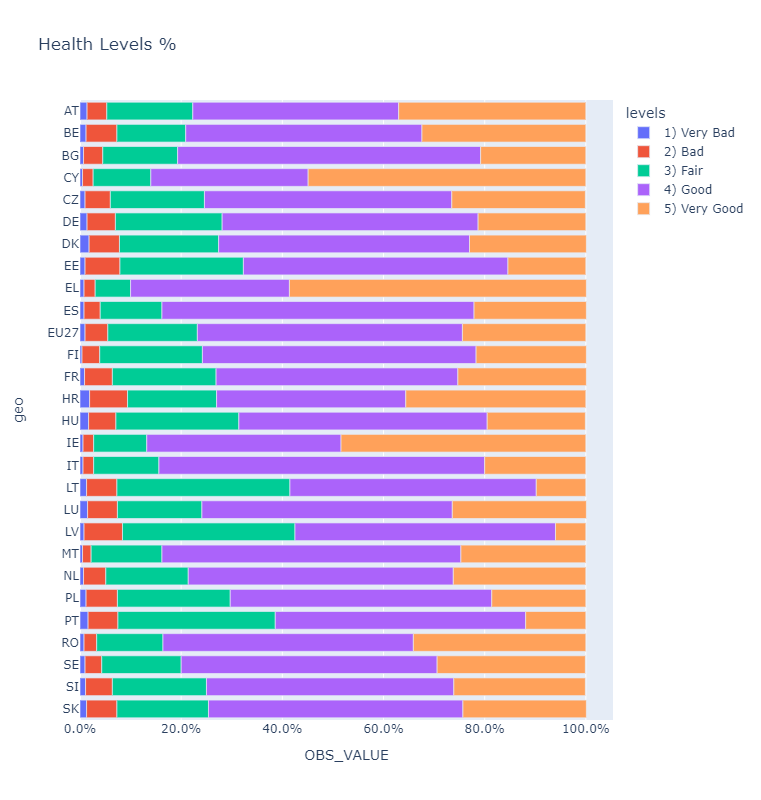

In [120]:
df = df.sort_values(['geo', 'levels'], ascending = [False, True])

fig = px.bar(df, x='OBS_VALUE', y = 'geo', color = 'levels',
             barmode = 'relative',
             height = 800, width = 600, title = "Health Levels %")
fig.update_layout(xaxis_tickformat = '.1%')

fig.show()

In [121]:
#saving cleaned data 
path = "../data/clean/Health Status/health_status_eu.csv"

df.to_csv(path, index = False, float_format = "%.3f")